In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# 1.Download the Dataset and Understand the Format (10 Points)

# 2.Generate the Data Matrix and the Label vector (10 Points)

In [ ]:
path = os.path.abspath(os.curdir)
path

'C:\\Users\\SourcesNet'

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
x_features = []
y_labels = []
path  = "E:\year3_term2\pattern_recognition\Assigments\Assigment1"

folder_path = path + '\pca_lda_dataset'

def import_data(folder_path):
    for i in tqdm(os.listdir(folder_path)) :
        class_path = folder_path + '/' + i
        for j in os.listdir(class_path) :
            img = plt.imread(os.path.join(class_path, j))
            x_features.append(img)
            y_labels.append(i)
    return x_features, y_labels
        
    
x_features, y_labels = import_data(folder_path)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:03<00:00, 12.21it/s]


In [ ]:
x_features[0]

array([[48, 49, 45, ..., 56, 56, 54],
       [45, 52, 39, ..., 52, 50, 51],
       [45, 50, 42, ..., 48, 53, 50],
       ...,
       [50, 48, 50, ..., 45, 46, 46],
       [45, 54, 49, ..., 46, 47, 47],
       [51, 51, 51, ..., 47, 46, 46]], dtype=uint8)

s1


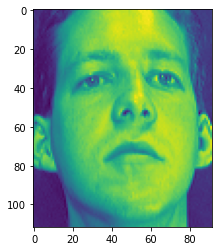

In [ ]:
plt.imshow(x_features[9])
print(y_labels[9])

In [ ]:
x_features[0].shape

(112, 92)

In [ ]:
type(x_features[0])

numpy.ndarray

In [ ]:
z = x_features[0].reshape(-1)
z

array([48, 49, 45, ..., 47, 46, 46], dtype=uint8)

### a.Convert every image into a vector of 10304 values corresponding to the image size.
### b.Stack the 400 vectorsinto a single Data Matrix D and generate the label vector y.The labels are integers from 1:40 corresponding to the subject id.

In [ ]:
def flatten_images(x_features):
    for i in range(len(x_features)) :
        x_features[i] = x_features[i].reshape(-1) # we can use .ravel() also
    return x_features

x_features = flatten_images(x_features)

In [ ]:
x_features[0].shape

(10304,)

In [ ]:
len(x_features)

400

## 3.Split the Dataset into Training and Test sets (10 Points)
### a.From the Data Matrix D400x10304 keep the odd rows for training and the even rows for testing. 
### This will give you 5 instances per person for training and 5 instancesper person for testing.
### b.Split the labels vector accordingly.

In [ ]:
def encode_labels(y_labels):
    le = LabelEncoder()
    y_label_coded = le.fit_transform(y_labels)
    return y_label_coded, le
    
y_label_coded, le = encode_labels(y_labels)
y_label_coded

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [ ]:
def split_data_even_odd(x_features, y_label_coded):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    for i in range(len(x_features)) :
        if i % 2 == 0 :
            x_train.append(x_features[i])
            y_train.append(y_label_coded[i])
        else :
            x_test.append(x_features[i])
            y_test.append(y_label_coded[i])
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_data_even_odd(x_features, y_label_coded)

In [ ]:
len(x_train)
print(x_train[0] == x_features[0])
print(x_train[60] == x_features[120])
print(y_train[0] == y_label_coded[0])
print(y_train[60] == y_label_coded[120])

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
True
True


In [ ]:
x_train.shape
mean_vector = x_train.mean(axis = 0)
mean_vector.shape

(1, 10304)

# 4.Classification using PCA(30 points)
### a.Use the pseudo code below for computing the projection matrix U. Define thealpha= {0.8,0.85,0.9,0.95}
### b.Project the training set, andtest sets separately using the same projection matrix.

In [ ]:
def get_eigens_and_meanVector(x_train): #must be numpy matrix
    #compute mean
    mean_vector = x_train.mean(axis = 0)
    #center_data
    x_train_cen = x_train - mean_vector
    #compute covariance
    cov = 1 / len(x_train_cen) * (np.dot(x_train_cen.T, x_train_cen))
    #compute eigen vals and eigen vec
    eig_val, eig_vec = np.linalg.eigh(cov)
    return eig_val, eig_vec, mean_vector

In [ ]:
def get_proj_mat(eig_val, eig_vec, alpha):
    #fraction of total variance
    fraction = []
    eig_sum=0
    eig_val_rev = eig_val[::-1]
    eig_vec_rev = eig_vec[::-1]

    for i in eig_val_rev :
        eig_sum += i
        fraction.append(eig_sum/eig_val_rev.sum())
    fraction = np.array(fraction)
    #choose dimensionality
    fraction_trimed = fraction > alpha
    smallest_ind = 0
    for i in range(len(fraction_trimed)) :
        if fraction_trimed[i] == True :
            smallest_ind = i
            break;
    #reduced basis
    proj_mat = eig_vec_rev[:smallest_ind+1]
    return proj_mat

In [ ]:
def center_data(x_train, x_test, mean_vector):
    return x_train-mean_vector, x_test-mean_vector

In [ ]:
def get_projected_mat(x_train, x_test, proj_mat):
    x_train_proj = np.dot(x_train, proj_mat.T)
    #x_test_cen = x_test- x_train_proj.mean(axis=1)
    x_test_proj = np.dot(x_test, proj_mat.T)
    return x_train_proj, x_test_proj

### c.Use a simple classifier (first Nearest Neighbor to determine the class labels).
### d.Report Accuracy for every value of alpha separately.

In [ ]:
def classify_KNN(x_train_proj, y_train, x_test_proj, y_test, alpha, neighbors=1):
    knn = KNN(n_neighbors = neighbors)
    knn.fit(x_train_proj, y_train)
    y_pred = knn.predict(x_test_proj)
    print("accuracy of alpha",alpha,"and neighbours =", neighbors,"is", accuracy_score(y_pred, y_test))
    print("precision of alpha",alpha,"and neighbours =", neighbors,"is", precision_score(y_pred, y_test, average = 'weighted'))
    print("recall of alpha",alpha,"and neighbours =", neighbors,"is", recall_score(y_pred, y_test, average = 'macro'))
    print("f1 score of alpha",alpha,"and neighbours =", neighbors,"is", f1_score(y_pred, y_test, average = 'weighted'))

In [ ]:
x_train = np.matrix(x_train)
x_test = np.matrix(x_test)
y_train = np.array(y_train).reshape(200,1)
y_test = np.array(y_test).reshape(200,1)
eig_val, eig_vec, mean_vector = get_eigens_and_meanVector(x_train)

In [ ]:
alphas = [0.8, 0.85, 0.9, 0.95]
for alpha in alphas:
    proj_mat = get_proj_mat(eig_val, eig_vec, alpha)
    x_train_cen, x_test_cen = center_data(x_train, x_test, mean_vector)
    x_train_proj, x_test_proj = get_projected_mat(x_train_cen, x_test_cen, proj_mat)
    classify_KNN(x_train_proj, y_train, x_test_proj, y_test, alpha, neighbors = 1)
    print("________________________________________________________")
    

C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:

accuracy of alpha 0.8 and neighbours = 1 is 0.86
precision of alpha 0.8 and neighbours = 1 is 0.905
recall of alpha 0.8 and neighbours = 1 is 0.8694543650793651
f1 score of alpha 0.8 and neighbours = 1 is 0.8693334443334443
________________________________________________________
accuracy of alpha 0.85 and neighbours = 1 is 0.87
precision of alpha 0.85 and neighbours = 1 is 0.91
recall of alpha 0.85 and neighbours = 1 is 0.8940178571428572
f1 score of alpha 0.85 and neighbours = 1 is 0.8765394327894327
________________________________________________________
accuracy of alpha 0.9 and neighbours = 1 is 0.88
precision of alpha 0.9 and neighbours = 1 is 0.9209999999999999
recall of alpha 0.9 and neighbours = 1 is 0.8958630952380954
f1 score of alpha 0.9 and neighbours = 1 is 0.8892829392829392
________________________________________________________
accuracy of alpha 0.95 and neighbours = 1 is 0.905
precision of alpha 0.95 and neighbours = 1 is 0.93
recall of alpha 0.95 and neighbours = 1

C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:

### e.Can you find a relation between alpha and classification accuracy?

### From the results it's obvious that by increasing the alpha the accuracy of the model increases
#### This happens because the percentage of data loss from our data decrease so the accuracy of the model increases
#### i.e. when increasing the alpha the new dims (eigen vectors) become more and more representative for the data

# 5. Classification Using LDA (30 Points)

---




## 1. Use the pseudo code below for LDA. 

In [ ]:
y_train = np.asarray(y_train)
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
uniqueClasses = np.unique(y_train)
print(uniqueClasses)
print(x_train)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[[ 48  49  45 ...  47  46  46]
 [ 60  60  62 ...  32  34  34]
 [ 63  53  35 ...  41  10  24]
 ...
 [114 110 112 ...  93  89  86]
 [113 112 111 ...  87  87  89]
 [111 114 112 ...  88  86  92]]


Calculate the mean vector for every class Mu1,Mu2,...,Mu40.

In [ ]:
meanVectors = []
eachClassIndices = []
for i in tqdm(range(len(uniqueClasses))):
    indices = np.where(y_train == uniqueClasses[i])
    array = np.asarray(x_train[indices[0], :])
    meanVectors.append(np.mean(array, axis=0))
    eachClassIndices.append( indices[0])

meanVectors = np.asarray(meanVectors)
print(meanVectors.shape)

100%|████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 2228.20it/s]

(40, 10304)




Calculate the mean vector for every class Mu1, Mu2, ..., Mu40.

In [ ]:
overAllMean = np.mean(x_train, axis=0)
print(overAllMean)
print(overAllMean.shape)

[[84.97  84.79  85.055 ... 76.39  73.815 72.215]]
(1, 10304)


Replace $ \ B $ matrix by $ \ S_{b} $.
   
   $$ \ S_{b} = \sum_{k=1}^{m}n_k (\mu_k - \mu)(\mu_k-\mu)^T $$

Here, m is the number of classes, μ is the overall sample mean, and $\ n_{k} $ is the
number of samples in the k-th class.


In [ ]:
sb = np.zeros([10304,10304])
nk = len(eachClassIndices[0])
for i in range(len(uniqueClasses)):
    centered = np.asmatrix(meanVectors[i] - overAllMean)
    sb += (nk * np.matmul(centered.T , centered) ) 

print(sb)

[[231615.82  228816.94  231111.73  ... -41390.46  -19667.31   -7796.11 ]
 [228816.94  226547.58  228482.91  ... -39573.22  -18219.37   -7079.97 ]
 [231111.73  228482.91  231351.995 ... -39955.09  -18238.365  -7093.165]
 ...
 [-41390.46  -39573.22  -39955.09  ... 335064.38  304869.63  288210.43 ]
 [-19667.31  -18219.37  -18238.365 ... 304869.63  292480.555 277844.955]
 [ -7796.11   -7079.97   -7093.165 ... 288210.43  277844.955 272640.155]]


Calculating $ \ S $ matrix

In [ ]:
s = np.zeros([10304,10304])
for j in tqdm(range(len(eachClassIndices))):
    D = np.asarray(x_train[eachClassIndices[j], :])
    z = np.asarray(D) - meanVectors[j]
    s += np.matmul(z.T , z)

print(s)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:40<00:00,  1.00s/it]

[[ 26322.   24844.8  24771.6 ...   -757.2  -2197.8   3702.4]
 [ 24844.8  25913.6  24942.4 ...    190.6   -395.4   4566. ]
 [ 24771.6  24942.4  25832.4 ...   -331.2    332.4   6442.8]
 ...
 [  -757.2    190.6   -331.2 ... 143575.2  90017.8  74673.8]
 [ -2197.8   -395.4    332.4 ...  90017.8  96311.6  82691. ]
 [  3702.4   4566.    6442.8 ...  74673.8  82691.   95567.6]]


Calculating $ \  S^{-1} $

In [ ]:
s = np.asmatrix(s)
sInv = np.linalg.inv(s)

Calculating eignValues and eignVectors $  of \ S^{-1} B $

## using eigh

In [ ]:
eignValues, eignVectors = np.linalg.eigh(np.matmul(sInv, sb))

In [ ]:
print(eignValues)
print("**************")
print(eignVectors)

[-2.92418364e+19 -6.91884321e+18 -4.38651485e+18 ...  4.38788684e+18
  6.84508688e+18  2.92929188e+19]
**************
[[ 0.00089708 -0.00042311  0.00755663 ... -0.0060608   0.00060586
   0.00094571]
 [ 0.00118315 -0.00024026  0.00752417 ... -0.00594848  0.0004153
   0.00122736]
 [ 0.00092922 -0.00065337  0.0071325  ... -0.00557597  0.0008396
   0.00097386]
 ...
 [ 0.00169658 -0.00520415 -0.00761922 ... -0.00718713 -0.00519391
  -0.00173865]
 [ 0.01989368 -0.00842385  0.02234079 ...  0.0244574  -0.0082325
  -0.0198602 ]
 [-0.00690817  0.00379051 -0.00739395 ... -0.00791913  0.00348434
   0.00693541]]


In [ ]:
kval = eignValues
kvec = eignVectors

In [ ]:
eignValues = kval
eignVectors = kvec
print(eignVectors[0])

[[ 0.00089708 -0.00042311  0.00755663 ... -0.0060608   0.00060586
   0.00094571]]


In [ ]:
idx = np.asmatrix(eignValues.argsort())
idx = np.flip(idx)

eignValues = eignValues[idx]
eignVectors = eignVectors[idx,:].reshape(10304, 10304).T
# print(eignValues)
# print(eignVectors)

In [ ]:
projectionMatrix  = np.asmatrix(eignVectors[0:39,:])
print(projectionMatrix)

[[-0.00690817  0.01989368  0.00169658 ...  0.00092922  0.00118315
   0.00089708]
 [ 0.00379051 -0.00842385 -0.00520415 ... -0.00065337 -0.00024026
  -0.00042311]
 [-0.00739395  0.02234079 -0.00761922 ...  0.0071325   0.00752417
   0.00755663]
 ...
 [-0.00387969  0.00717989 -0.00058251 ... -0.01264301 -0.01305138
  -0.01203097]
 [-0.03440586  0.02452077 -0.01247236 ...  0.00410767  0.00297515
   0.0036107 ]
 [-0.00395752  0.00101169  0.00053511 ... -0.00908388 -0.00993934
  -0.00848846]]


In [ ]:
print(projectionMatrix.shape)
print(x_train.shape)
x_trainProj = np.matmul(projectionMatrix, x_train.T).T
x_testProj = np.matmul(projectionMatrix, x_test.T).T
print(x_trainProj.shape)

(39, 10304)
(200, 10304)
(200, 39)


In [ ]:
neighbours = [1,3,5,7]
def LDATuning():
    for i in neighbours:
        knn = KNN(n_neighbors = i)
        knn.fit(np.asarray(x_trainProj), y_train.ravel())
        y_pred = knn.predict(np.asarray(x_testProj))
        print("accuracy for nerigbour",i,"is",accuracy_score(y_pred, y_test.ravel()))

In [ ]:
LDATuning()

accuracy for nerigbour 1 is 0.945
accuracy for nerigbour 3 is 0.88
accuracy for nerigbour 5 is 0.79
accuracy for nerigbour 7 is 0.745


## using eig and getting the real part of complex numbers only

In [ ]:
eignValues, eignVectors = np.linalg.eig(np.dot(sInv, sb))

### save eignvalues and eignvectors

In [ ]:
print(eignValues)
print("**************")
print(eignVectors)

[-9.34508240e+16  6.06333998e+16  3.79389558e+16 ...  4.69797176e-02
  3.34747539e-02  3.34747539e-02]
**************
[[ 0.00265692  0.01368917 -0.00196634 ...  0.00475322 -0.00047541
   0.00709374]
 [ 0.00220539  0.0725278   0.04464433 ... -0.01389288  0.04542002
  -0.04397632]
 [ 0.00220539  0.0725278   0.04464433 ... -0.01389288  0.04542002
  -0.04397632]
 ...
 [-0.00321403  0.00263401  0.01023252 ...  0.00523723 -0.00229609
  -0.0129273 ]
 [-0.00321403  0.00263401  0.01023252 ...  0.00523723 -0.00229609
  -0.0129273 ]
 [-0.00434263  0.00789021  0.01024153 ... -0.00912318  0.00012467
  -0.00482687]]


In [ ]:
eigen_values_dec = eignValues.real
eigen_values_dec
eigen_vectors_dec = eignVectors.real
eigen_vectors_dec

matrix([[ 0.00220539,  0.0725278 ,  0.04464433, ..., -0.01389288,
          0.04542002, -0.04397632],
        [ 0.00220539,  0.0725278 ,  0.04464433, ..., -0.01389288,
          0.04542002, -0.04397632],
        [-0.02663735, -0.0089756 , -0.08180356, ...,  0.02102278,
         -0.00410782, -0.02201513],
        ...,
        [-0.00100573,  0.00126888,  0.00330888, ...,  0.00116342,
         -0.00920813, -0.01336025],
        [ 0.00265692,  0.01368917, -0.00196634, ...,  0.00475322,
         -0.00047541,  0.00709374],
        [ 0.00265692,  0.01368917, -0.00196634, ...,  0.00475322,
         -0.00047541,  0.00709374]])

In [ ]:
kval = eigen_values_dec
kvec = eigen_vectors_dec

In [ ]:
eignValues = kval
eignVectors = kvec
print(eignVectors[0])

[[ 0.00220539  0.0725278   0.04464433 ... -0.01389288  0.04542002
  -0.04397632]]


### Continue 
Use 39 dominant eigenvectors instead of just one. You will have a projection matrix  $ \ U_{39x10304} $


Sorting Eigen vectors based on Eigen values

In [ ]:
eignValues = eignValues.reshape(-1)
eignValues

array([ 6.06333998e+16,  3.79389558e+16,  1.81822589e+16, ...,
       -1.62861976e+16, -1.62861976e+16, -9.34508240e+16])

In [ ]:
idx = np.argsort(abs(eignValues))[::-1]
eignValues = eignValues[idx]
eignVectors = eignVectors[idx]
print(eignValues)
print(eignVectors)

[-9.34508240e+16  6.06333998e+16  3.79389558e+16 ...  4.69797176e-02
  3.34747539e-02  3.34747539e-02]
[[ 0.00265692  0.01368917 -0.00196634 ...  0.00475322 -0.00047541
   0.00709374]
 [ 0.00220539  0.0725278   0.04464433 ... -0.01389288  0.04542002
  -0.04397632]
 [ 0.00220539  0.0725278   0.04464433 ... -0.01389288  0.04542002
  -0.04397632]
 ...
 [-0.00321403  0.00263401  0.01023252 ...  0.00523723 -0.00229609
  -0.0129273 ]
 [-0.00321403  0.00263401  0.01023252 ...  0.00523723 -0.00229609
  -0.0129273 ]
 [-0.00434263  0.00789021  0.01024153 ... -0.00912318  0.00012467
  -0.00482687]]


In [ ]:
#idx = np.asmatrix(eignValues.argsort())
#idx = np.flip(idx)

#eignValues = eignValues[0][idx]
#eignVectors = eignVectors[idx,:].reshape(10304, 10304).T
# print(eignValues)
# print(eignVectors)

Get The projection matrix using the 39 dominant eigen vectors

In [ ]:
projectionMatrix  = np.asmatrix(eignVectors[0:39,:])
print(projectionMatrix)

[[ 2.65692043e-03  1.36891733e-02 -1.96634442e-03 ...  4.75322091e-03
  -4.75413083e-04  7.09374458e-03]
 [ 2.20539187e-03  7.25278013e-02  4.46443336e-02 ... -1.38928797e-02
   4.54200152e-02 -4.39763182e-02]
 [ 2.20539187e-03  7.25278013e-02  4.46443336e-02 ... -1.38928797e-02
   4.54200152e-02 -4.39763182e-02]
 ...
 [ 5.35126241e-03  3.15119999e-03 -1.01248934e-02 ... -2.21946698e-03
   1.06456475e-02 -7.00970879e-03]
 [-4.00609715e-03  6.95549022e-03 -3.94224340e-03 ... -5.54552257e-05
   8.53573250e-03  1.10225905e-03]
 [-4.00609715e-03  6.95549022e-03 -3.94224340e-03 ... -5.54552257e-05
   8.53573250e-03  1.10225905e-03]]


## 2. Projection
Project the training set, and test sets separately using the same projection matrix U. You will have 39 dimensions in the new space.


In [ ]:
print(projectionMatrix.shape)
print(x_train.shape)
x_trainProj = np.matmul(projectionMatrix, x_train.T).T
x_testProj = np.matmul(projectionMatrix, x_test.T).T
print(x_trainProj.shape)

(39, 10304)
(200, 10304)
(200, 39)


## 3. Use a simple classifier 
(first Nearest Neighbor to determine the class
labels).


In [ ]:
neighbours = [1,3,5,7]
def LDATuning():
    for i in neighbours:
        knn = KNN(n_neighbors = i)
        knn.fit(np.asarray(x_trainProj), y_train.ravel())
        y_pred = knn.predict(np.asarray(x_testProj))
        print(accuracy_score(y_pred, y_test.ravel()))

In [ ]:
LDATuning()

0.58
0.48
0.475
0.46


## Another approach of getting magnitude of complex numbers

In [ ]:
eignValues2, eignVectors2 = np.linalg.eig(np.dot(sInv, sb))

In [ ]:
print(eignValues2)
print(eignVectors2)

[ 1.52786157e+16+9.32215054e+16j  1.52786157e+16-9.32215054e+16j
 -9.34508240e+16+0.00000000e+00j ...  3.57692218e-01-1.90476514e+00j
 -3.14131620e+00+3.31314885e+00j -3.14131620e+00-3.31314885e+00j]
[[-0.07113124+0.03110685j -0.07113124-0.03110685j  0.03680117+0.j
  ... -0.00653729-0.0035939j   0.00294049-0.00381221j
   0.00294049+0.00381221j]
 [-0.03933062-0.01586611j -0.03933062+0.01586611j  0.05424734+0.j
  ... -0.00609259+0.00110204j  0.00497355+0.0015176j
   0.00497355-0.0015176j ]
 [-0.04397632+0.04700058j -0.04397632-0.04700058j -0.02201513+0.j
  ... -0.01336025-0.00010944j  0.00709374+0.00015414j
   0.00709374-0.00015414j]
 ...
 [ 0.00087385-0.00287176j  0.00087385+0.00287176j -0.00268208+0.j
  ... -0.00107785+0.00400758j -0.00703203+0.00259255j
  -0.00703203-0.00259255j]
 [ 0.01775487+0.01180404j  0.01775487-0.01180404j -0.02337521+0.j
  ...  0.001733  -0.00465691j  0.00212031+0.00234413j
   0.00212031-0.00234413j]
 [-0.00812847+0.00368561j -0.00812847-0.00368561j  0.00037188

In [ ]:
eigen_values_dec = np.abs(eignValues2)
eigen_values_dec
eigen_vectors_dec = np.abs(eignVectors2)
eigen_vectors_dec

matrix([[0.07763562, 0.07763562, 0.03680117, ..., 0.00746004, 0.00481451,
         0.00481451],
        [0.04241028, 0.04241028, 0.05424734, ..., 0.00619146, 0.00519994,
         0.00519994],
        [0.06436592, 0.06436592, 0.02201513, ..., 0.0133607 , 0.00709542,
         0.00709542],
        ...,
        [0.00300177, 0.00300177, 0.00268208, ..., 0.00415   , 0.00749472,
         0.00749472],
        [0.02132066, 0.02132066, 0.02337521, ..., 0.00496892, 0.0031608 ,
         0.0031608 ],
        [0.00892501, 0.00892501, 0.00037188, ..., 0.00387884, 0.00961418,
         0.00961418]])

In [ ]:
kval = eigen_values_dec
kvec = eigen_vectors_dec
kval = kval.reshape(-1)
kval

array([9.44652590e+16, 9.44652590e+16, 9.34508240e+16, ...,
       1.93805932e+00, 4.56561308e+00, 4.56561308e+00])

In [ ]:
idx = np.asmatrix(kval.argsort())
idx = np.flip(idx)

kval = kval[idx]
kvec = kvec[idx,:].reshape(10304, 10304).T

In [ ]:

eignVectors
projectionMatrix  = np.asmatrix(kvec[0:39,:])
print(projectionMatrix)

[[0.07763562 0.04241028 0.06436592 ... 0.00355559 0.00300177 0.00384001]
 [0.07763562 0.04241028 0.06436592 ... 0.00355559 0.00300177 0.00384001]
 [0.03680117 0.05424734 0.02201513 ... 0.00296081 0.00268208 0.00144671]
 ...
 [0.11840341 0.02878934 0.0895611  ... 0.00420967 0.00442183 0.00341005]
 [0.11840341 0.02878934 0.0895611  ... 0.00420967 0.00442183 0.00341005]
 [0.13601384 0.03628203 0.10806024 ... 0.00172387 0.00166816 0.00056748]]


In [ ]:
print(projectionMatrix.shape)
print(x_train.shape)
x_trainProj = np.matmul(projectionMatrix, x_train.T).T
x_testProj = np.matmul(projectionMatrix, x_test.T).T
print(x_trainProj.shape)

(39, 10304)
(200, 10304)
(200, 39)


In [ ]:
neighbours = [1,3,5,7]
def LDATuning():
    for i in neighbours:
        knn = KNN(n_neighbors = i)
        knn.fit(np.asarray(x_trainProj), y_train.ravel())
        y_pred = knn.predict(np.asarray(x_testProj))
        print(accuracy_score(y_pred, y_test.ravel()))

In [ ]:
LDATuning()

0.215
0.19
0.165
0.18


# Draft

In [ ]:
x_train = np.matrix(x_train)
y_train = np.matrix(y_train)
# compute the mean
mean1 = x_train[0].mean()
mean1

128.33821816770185

In [ ]:
mean = x_train.mean(axis = 1)

In [ ]:
x_train

matrix([[ 48,  49,  45, ...,  47,  46,  46],
        [ 60,  60,  62, ...,  32,  34,  34],
        [ 63,  53,  35, ...,  41,  10,  24],
        ...,
        [114, 110, 112, ...,  93,  89,  86],
        [113, 112, 111, ...,  87,  87,  89],
        [111, 114, 112, ...,  88,  86,  92]], dtype=uint8)

In [ ]:
x_train_cen = x_train - mean
x_train_cen

matrix([[ -80.33821817,  -79.33821817,  -83.33821817, ...,  -81.33821817,
          -82.33821817,  -82.33821817],
        [ -87.98893634,  -87.98893634,  -85.98893634, ..., -115.98893634,
         -113.98893634, -113.98893634],
        [ -79.14926242,  -89.14926242, -107.14926242, ..., -101.14926242,
         -132.14926242, -118.14926242],
        ...,
        [  -0.15130047,   -4.15130047,   -2.15130047, ...,  -21.15130047,
          -25.15130047,  -28.15130047],
        [  -1.60461957,   -2.60461957,   -3.60461957, ...,  -27.60461957,
          -27.60461957,  -25.60461957],
        [  -5.30619177,   -2.30619177,   -4.30619177, ...,  -28.30619177,
          -30.30619177,  -24.30619177]])

In [ ]:
cov = 1 / len(x_train_cen) * (np.dot(x_train_cen.T, x_train_cen))
cov

matrix([[1976.34805901, 1960.26574729, 1969.31129174, ..., 1037.08246264,
         1181.18927893, 1310.84550078],
        [1960.26574729, 1959.59343556, 1962.30398001, ..., 1057.75015092,
         1204.7469672 , 1326.33818906],
        [1969.31129174, 1962.30398001, 1979.05952446, ..., 1048.89569537,
         1203.27251165, 1330.21373351],
        ...,
        [1037.08246264, 1057.75015092, 1048.89569537, ..., 4275.79686627,
         3921.82368256, 3816.33490441],
        [1181.18927893, 1204.7469672 , 1203.27251165, ..., 3921.82368256,
         3962.76549884, 3880.1317207 ],
        [1310.84550078, 1326.33818906, 1330.21373351, ..., 3816.33490441,
         3880.1317207 , 3979.69794255]])

In [ ]:
cov.shape

(10304, 10304)

In [ ]:
eig_val, eig_vec = np.linalg.eigh(cov)
eig_val

array([-1.47865309e-09, -9.67008802e-10, -9.39322865e-10, ...,
        1.09462153e+06,  2.49586831e+06,  1.03243713e+07])

In [ ]:
eig_vec

matrix([[ 4.40999566e-13,  0.00000000e+00,  0.00000000e+00, ...,
         -2.02077162e-02, -1.26709374e-02,  8.58581305e-03],
        [ 2.39118447e-01, -1.18850190e-01,  2.50816148e-01, ...,
         -2.01693608e-02, -1.26069511e-02,  8.63548751e-03],
        [-2.73098009e-01,  2.33758767e-01, -8.76188788e-02, ...,
         -2.03500603e-02, -1.28602767e-02,  8.54150292e-03],
        ...,
        [ 9.26977299e-03, -4.96540431e-03,  1.40951771e-02, ...,
          9.62853691e-03, -2.51121222e-03,  1.28744880e-02],
        [ 6.11347741e-03, -4.87901502e-05, -8.41145974e-04, ...,
          7.10166309e-03, -2.96597121e-03,  1.35954397e-02],
        [-1.43114475e-02, -2.73048956e-03, -9.79261541e-03, ...,
          6.10567764e-03, -4.77243340e-03,  1.41162794e-02]])

In [ ]:
fraction = []
eig_sum=0
eig_val_rev = eig_val[::-1]
eig_vec_rev = eig_vec[::-1]

for i in eig_val_rev :
    eig_sum += i
    fraction.append(eig_sum/eig_val_rev.sum())

In [ ]:
len(fraction)

10304

In [ ]:
fraction[10303]

1.0000000000000007

In [ ]:
fraction = np.array(fraction)
print(fraction)

[0.43845898 0.54445437 0.59094114 ... 1.         1.         1.        ]


In [ ]:
alpha = [0.8, 0.85, 0.9, 0.95]

fraction_trimed = fraction > alpha[0]
fraction_trimed

array([False, False, False, ...,  True,  True,  True])

In [ ]:
smallest_ind = 0

for i in range(len(fraction_trimed)) :
    if fraction_trimed[i] == True :
        smallest_ind = i
        break;

smallest_ind

18

In [ ]:
proj_mat = eig_vec_rev[:smallest_ind+1]
proj_mat

matrix([[-1.43114475e-02, -2.73048956e-03, -9.79261541e-03, ...,
          6.10567764e-03, -4.77243340e-03,  1.41162794e-02],
        [ 6.11347741e-03, -4.87901502e-05, -8.41145974e-04, ...,
          7.10166309e-03, -2.96597121e-03,  1.35954397e-02],
        [ 9.26977299e-03, -4.96540431e-03,  1.40951771e-02, ...,
          9.62853691e-03, -2.51121222e-03,  1.28744880e-02],
        ...,
        [ 5.02321565e-03, -7.07822858e-03, -1.24872236e-03, ...,
          1.75339931e-02, -9.88204091e-03,  9.64316213e-03],
        [-3.49250542e-03, -9.80585753e-04,  6.38016881e-03, ...,
          1.79483112e-02, -8.50801606e-03,  9.31191296e-03],
        [ 4.26091060e-03, -2.86357337e-03, -5.19720200e-03, ...,
          1.34014312e-02, -7.67041412e-03,  9.26949872e-03]])

In [ ]:
proj_mat.shape

(19, 10304)

In [ ]:
x_train_proj = np.dot(x_train, proj_mat.T)
x_test_proj = np.dot(x_test, proj_mat.T)
x_train_proj.shape
x_test_proj.shape

(200, 19)

In [ ]:
y_test = np.array(y_test)
y_train = y_train.reshape(200,1)
y_test = y_test.reshape(200,1)

In [ ]:
knn = KNN(n_neighbors = 1)
knn.fit(x_train_proj, y_train)
y_pred = knn.predict(x_test_proj)
print("accuracy of alpha  = 0.8 and neighbours = 10 is", accuracy_score(y_pred, y_test))

accuracy of alpha  = 0.8 and neighbours = 10 is 0.705


C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:

# 7. Compare vs Non-Face Images (15 Points)

---



## Download non-face images and make them of the same size 92x112

In [ ]:
from PIL import Image
new_width = 92
new_height = 112
non_face_features = []

non_face_images_path = path + '/drive/MyDrive' + '/non-face_images'

def import_non_face_images_resized(non_face_images_path):
    for i in tqdm(os.listdir(non_face_images_path)) :
        class_path = non_face_images_path + '/' + i
        for j in os.listdir(class_path) :
            image_path = os.path.join(class_path, j)            
            # image = Image.open(image_path).convert('L')
            # resized_image = image.resize((new_width, new_height))
            # resized_image.save(image_path)
            img = plt.imread(image_path)
            non_face_features.append(img)
    return non_face_features
        
    
non_face_features = import_non_face_images_resized(non_face_images_path)
# reshape the images to be of size 10304
non_face_features = flatten_images(non_face_features[:100])
non_face_features = np.asarray(non_face_features)

100%|██████████| 7/7 [03:01<00:00, 25.90s/it]


In [ ]:
# Join the faces with the non faces images into one array
def join_faces_with_non_faces(number_of_non_face_images):
    D = np.concatenate((np.array(non_face_features[ : number_of_non_face_images, :]), x_features), axis = 0)
    D_labels = np.concatenate((np.zeros((number_of_non_face_images, 1)), np.ones((400, 1))), axis=0)
    return D, D_labels

In [ ]:
def convert_to_numpy_arrays(D_train, D_test, D_labels_train, D_labels_test):
    D_train = np.asarray(D_train)
    D_labels_train = np.asarray(D_labels_train)
    D_test = np.asarray(D_test)
    D_labels_test = np.asarray(D_labels_test)
    new_unique_classes = np.unique(D_labels_train)
    return D_train, D_labels_train, D_test, D_labels_test, new_unique_classes

In [ ]:
def find_mean_vector(D_train, D_labels_train, new_unique_classes):
    new_mean_vectors = []
    new_each_class_indices = []
    for i in range(len(new_unique_classes)):
        indices = np.where(D_labels_train == new_unique_classes[i])
        array = np.asarray(D_train[indices[0], :])
        new_mean_vectors.append(np.mean(array, axis=0))
        new_each_class_indices.append( indices[0])
    new_mean_vectors = np.asarray(new_mean_vectors)
    return new_mean_vectors, new_each_class_indices

In [ ]:
def calc_eigen_values_and_eigen_vectors(new_each_class_indices, new_unique_classes, new_mean_vectors, new_over_all_mean):
    new_sb = np.zeros([10304,10304])
    new_nk = len(new_each_class_indices[0])
    for i in range(len(new_unique_classes)):
        centered = np.asmatrix(new_mean_vectors[i] - new_over_all_mean)
        new_sb += (new_nk * np.matmul(centered.T , centered) )
    new_s = np.zeros([10304,10304])
    for j in range(len(new_each_class_indices)):
        D_temp = np.asarray(D_train[new_each_class_indices[j], :])
        z = np.asarray(D_temp) - new_mean_vectors[j]
        new_s += np.matmul(z.T , z)
    new_s = np.asmatrix(new_s)
    new_sInv = np.linalg.inv(new_s)
    new_eignValues, new_eignVectors = np.linalg.eigh(np.matmul(new_sInv, new_sb))
    new_idx = np.asmatrix(new_eignValues.argsort())
    new_idx = np.flip(new_idx)

    new_eignValues = new_eignValues[new_idx]
    new_eignVectors = new_eignVectors[new_idx,:].reshape(10304, 10304).T
    return new_eignVectors

In [ ]:
new_neighbours = [1,3,5,7]
def new_LDATuning(D_train, D_test, index_of_last_dominant_eigen_vector, new_eignVectors):
    new_projectionMatrix  = np.asmatrix(new_eignVectors[0:index_of_last_dominant_eigen_vector,:])
    D_trainProj = np.matmul(new_projectionMatrix, D_train.T).T
    D_testProj = np.matmul(new_projectionMatrix, D_test.T).T
    knn = KNN(n_neighbors = 1)
    knn.fit(np.asarray(D_trainProj), D_labels_train.ravel())
    D_labels_pred = knn.predict(np.asarray(D_testProj))
    accuracy = accuracy_score(D_labels_pred, D_labels_test.ravel())
    precision = precision_score(D_labels_pred, D_labels_test.ravel(), average = 'weighted')
    recall = recall_score(D_labels_pred, D_labels_test.ravel(), average = 'weighted')
    f1 = f1_score(D_labels_pred, D_labels_test.ravel(), average = 'weighted')
    return accuracy, precision, recall, f1

# Plot the accuracy vs the number of non-faces images while fixing the number of face images.

In [ ]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for i in range(50, 401, 50):
    D, D_labels = join_faces_with_non_faces(i)
    # Split the data even and odd
    D_train, D_test, D_labels_train, D_labels_test = split_data_even_odd(D, D_labels)
    D_train, D_labels_train, D_test, D_labels_test, new_unique_classes = convert_to_numpy_arrays(D_train, D_test, D_labels_train, D_labels_test)
    new_mean_vectors, new_each_class_indices = find_mean_vector(D_train, D_labels_train, new_unique_classes)
    new_over_all_mean = np.mean(D_train, axis=0)
    new_eignVectors = calc_eigen_values_and_eigen_vectors(new_each_class_indices, new_unique_classes, new_mean_vectors, new_over_all_mean)
    accuracy, precision, recall, f1 = new_LDATuning(D_train, D_test, 39, new_eignVectors)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    print("Accuracy: ", accuracy)

Accuracy:  0.9422222222222222
Accuracy:  0.956
Accuracy:  0.952
Accuracy:  0.948
Accuracy:  0.936
Accuracy:  0.928
Accuracy:  0.928
Accuracy:  0.956


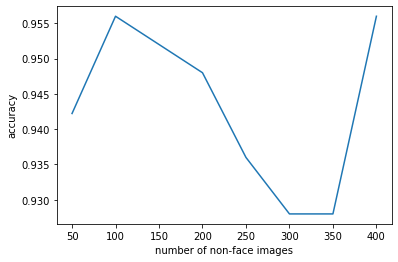

In [ ]:
plt.figure()
plt.plot(np.arange(50, 401, 50), accuracy_list)
plt.xlabel('number of non-face images')
plt.ylabel('accuracy')
plt.show()

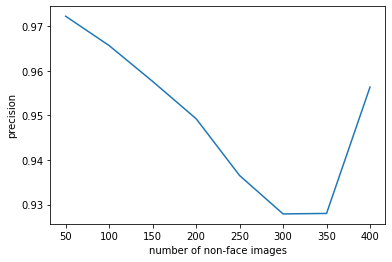

In [ ]:
plt.figure()
plt.plot(np.arange(50, 401, 50), precision_list)
plt.xlabel('number of non-face images')
plt.ylabel('precision')
plt.show()

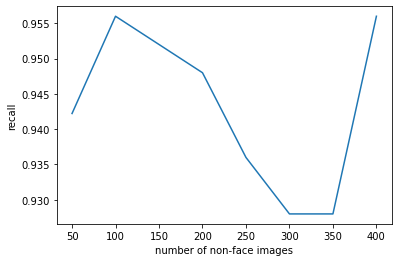

In [ ]:
plt.figure()
plt.plot(np.arange(50, 401, 50), recall_list)
plt.xlabel('number of non-face images')
plt.ylabel('recall')
plt.show()

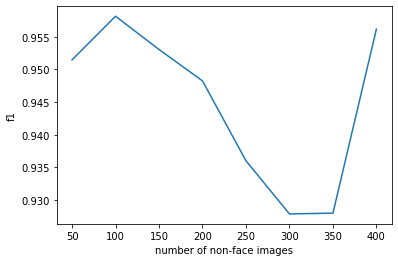

In [ ]:
plt.figure()
plt.plot(np.arange(50, 401, 50), f1_list)
plt.xlabel('number of non-face images')
plt.ylabel('f1')
plt.show()

#  Criticize the accuracy measure for large numbers of non-faces images in the training data.

As we saw from the plot, the accuracy decreases when we increase the size of the non-face images whlile fixing the number of face images.

In [ ]:
# Use 39 dominant eigen vectors
D, D_labels = join_faces_with_non_faces(400)
# Split the data even and odd
D_train, D_test, D_labels_train, D_labels_test = split_data_even_odd(D, D_labels)
D_train, D_labels_train, D_test, D_labels_test, new_unique_classes = convert_to_numpy_arrays(D_train, D_test, D_labels_train, D_labels_test)
new_mean_vectors, new_each_class_indices = find_mean_vector(D_train, D_labels_train, new_unique_classes)
new_over_all_mean = np.mean(D_train, axis=0)
new_eignVectors = calc_eigen_values_and_eigen_vectors(new_each_class_indices, new_unique_classes, new_mean_vectors, new_over_all_mean)
new_neighbours = [1,3,5,7]
new_projectionMatrix  = np.asmatrix(new_eignVectors[0:10,:])
D_trainProj = np.matmul(new_projectionMatrix, D_train.T).T
D_testProj = np.matmul(new_projectionMatrix, D_test.T).T
for i in new_neighbours:
    knn = KNN(n_neighbors = i)
    knn.fit(np.asarray(D_trainProj), D_labels_train.ravel())
    D_labels_pred = knn.predict(np.asarray(D_testProj))
    print("accuracy of neighbours =", i,"is", accuracy_score(D_labels_pred, D_labels_test.ravel()))
    print("precision of neighbours =", i,"is", precision_score(D_labels_pred, D_labels_test.ravel(), average = 'weighted'))
    print("recall of neighbours =", i,"is", recall_score(D_labels_pred, D_labels_test.ravel(), average = 'weighted'))
    print("f1 score of neighbours =", i,"is", f1_score(D_labels_pred, D_labels_test.ravel(), average = 'weighted'))
    success_case_found, failure_case_found = False, False
    for i in range(len(D_testProj)):
        if success_case_found and failure_case_found:
            break
        if not success_case_found and D_labels_pred[i] == D_labels_test[i]:
            success_case_found = True
            print("Success case: ")
            print("Actual Classification:", D_labels_test[i])
            print("Pred Classification:", D_labels_pred[i])
        if not failure_case_found and D_labels_pred[i] != D_labels_test[i]:
            failure_case_found = True
            print("Failure case: ")
            print("Actual Classification:", D_labels_test[i])
            print("Pred Classification:", D_labels_pred[i])
    print('-' * 100)        

accuracy of neighbours = 1 is 0.96
precision of neighbours = 1 is 0.9596
recall of neighbours = 1 is 0.96
f1 score of neighbours = 1 is 0.9597083456498176
Success case: 
Actual Classification: [0.]
Pred Classification: 0.0
Failure case: 
Actual Classification: [0.]
Pred Classification: 1.0
----------------------------------------------------------------------------------------------------
accuracy of neighbours = 3 is 0.94
precision of neighbours = 3 is 0.9455999999999999
recall of neighbours = 3 is 0.94
f1 score of neighbours = 3 is 0.9417420940001584
Success case: 
Actual Classification: [0.]
Pred Classification: 0.0
Failure case: 
Actual Classification: [0.]
Pred Classification: 1.0
----------------------------------------------------------------------------------------------------
accuracy of neighbours = 5 is 0.912
precision of neighbours = 5 is 0.91776
recall of neighbours = 5 is 0.912
f1 score of neighbours = 5 is 0.9141582643328792
Success case: 
Actual Classification: [0.]
Pre

# Bonus

In [ ]:
def split_data_seventy_thirty(x_features, y_label_coded):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    number_of_test_data = 400 * 0.3
    for i in range(len(x_features)):
        if i % 2 == 0 and number_of_test_data:
            number_of_test_data -= 1
            x_test.append(x_features[i])
            y_test.append(y_label_coded[i])
        else:            
            x_train.append(x_features[i])
            y_train.append(y_label_coded[i])
    return x_train, x_test, y_train, y_test

x_train_2, x_test_2, y_train_2, y_test_2 = split_data_seventy_thirty(x_features, y_label_coded)

# PCA

In [ ]:
x_train_2 = np.matrix(x_train_2)
x_test_2 = np.matrix(x_test_2)
y_train_2 = np.array(y_train_2).reshape(280,1)
y_test_2 = np.array(y_test_2).reshape(120,1)
eig_val_2, eig_vec_2, mean_vector_2 = get_eigens_and_meanVector(x_train_2)

In [ ]:
alphas = [0.8, 0.85, 0.9, 0.95]
for alpha in alphas:
    proj_mat_2 = get_proj_mat(eig_val_2, eig_vec_2, alpha)
    #x_train_cen, x_test_cen = center_data(x_train, x_test, mean_vector)
    x_train_proj_2, x_test_proj_2 = get_projected_mat(x_train_2, x_test_2, proj_mat_2)
    classify_KNN(x_train_proj_2, y_train_2, x_test_proj_2, y_test_2, alpha, neighbors = 1)
    print("________________________________________________________")
    

# LDA

In [ ]:
y_train_2 = np.asarray(y_train_2)
x_train_2 = np.asarray(x_train_2)
x_test_2 = np.asarray(x_test_2)
y_test_2 = np.asarray(y_test_2)
uniqueClasses_2 = np.unique(y_train_2)

meanVectors_2 = []
eachClassIndices_2 = []
for i in range(len(uniqueClasses_2)):
  indices = np.where(y_train_2 == uniqueClasses_2[i])
  array = np.asarray(x_train_2[indices[0], :])
  meanVectors_2.append(np.mean(array, axis=0))
  eachClassIndices_2.append( indices[0])

meanVectors_2 = np.asarray(meanVectors_2)
overAllMean_2 = np.mean(x_train_2, axis=0)

sb_2 = np.zeros([10304,10304])
nk_2 = len(eachClassIndices_2[0])
for i in range(len(uniqueClasses_2)):
  centered = np.asmatrix(meanVectors_2[i] - overAllMean_2)
  sb_2 += (nk_2 * np.matmul(centered.T , centered) ) 

s_2 = np.zeros([10304,10304])
for j in range(len(eachClassIndices_2)):
  D = np.asarray(x_train_2[eachClassIndices_2[j], :])
  z = np.asarray(D) - meanVectors_2[j]
  s_2 += np.matmul(z.T , z)

s_2 = np.asmatrix(s_2)
sInv_2 = np.linalg.inv(s_2)
eignValues_2, eignVectors_2 = np.linalg.eigh(np.matmul(sInv_2, sb_2))
idx_2 = np.asmatrix(eignValues_2.argsort())
idx_2 = np.flip(idx_2)

eignValues_2 = eignValues_2[idx_2]
eignVectors_2 = eignVectors_2[idx_2,:].reshape(10304, 10304).T

projectionMatrix_2  = np.asmatrix(eignVectors_2[0:39,:])
x_trainProj_2 = np.matmul(projectionMatrix_2, x_train_2.T).T
x_testProj_2 = np.matmul(projectionMatrix_2, x_test_2.T).T

for i in neighbours:
    knn = KNN(n_neighbors = i)
    knn.fit(np.asarray(x_trainProj_2), y_train_2.ravel())
    y_pred_2 = knn.predict(np.asarray(x_testProj_2))
    print(accuracy_score(y_pred_2, y_test_2.ravel()))

0.9583333333333334
0.8666666666666667
0.7416666666666667
0.7


# Variations of PCA & LDA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train_p, X_test, y_train_pca, y_test_pca = train_test_split(x_features, y_labels, test_size=0.3, random_state=42)

pca = PCA(n_components=39)
X_train_pca = pca.fit_transform(X_train_p)

clf = LogisticRegression(random_state=42)
clf.fit(X_train_pca, y_train_pca)

X_test_pca = pca.transform(X_test)
y_pred_pca = clf.predict(X_test_pca)

print("Accuracy:", accuracy_score(y_test_pca, y_pred_pca))
print("Precision:", precision_score(y_test_pca, y_pred_pca, average = 'weighted'))
print("Recall:", recall_score(y_test_pca, y_pred_pca, average = 'weighted'))
print("F1 score:", f1_score(y_test_pca, y_pred_pca, average = 'weighted'))


Accuracy: 0.975
Precision: 0.9826388888888888
Recall: 0.975
F1 score: 0.9750396825396825


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# split the data into training and test sets
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(x_features, y_labels, test_size=0.3, random_state=42)

# create an LDA object and fit the training data
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train_lda, y_train_lda)

# predict the classes of the test set
y_pred_lda = lda.predict(X_test_lda)

# evaluate the accuracy of the LDA model
accuracy = accuracy_score(y_test_lda, y_pred_lda)
print("Accuracy:", accuracy)


Accuracy: 0.95
